
Dane wczytane pomyślnie. Pierwsze 5 wierszy:
   ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  SIM_GIPERT  DLIT_AG  ZSN_A  nr_11  nr_01  nr_02  nr_03  nr_04  nr_07  nr_08  np_01  np_04  np_05  np_07  np_08  np_09  np_10  endocr_01  endocr_02  endocr_03  zab_leg_01  zab_leg_02  zab_leg_03  zab_leg_04  zab_leg_06  S_AD_KBRIG  D_AD_KBRIG  S_AD_ORIT  D_AD_ORIT  O_L_POST  K_SH_POST  MP_TP_POST  SVT_POST  GT_POST  FIB_G_POST  ant_im  lat_im  inf_im  post_im  IM_PG_P  ritm_ecg_p_01  ritm_ecg_p_02  ritm_ecg_p_04  ritm_ecg_p_06  ritm_ecg_p_07  ritm_ecg_p_08  n_r_ecg_p_01  n_r_ecg_p_02  n_r_ecg_p_03  n_r_ecg_p_04  n_r_ecg_p_05  n_r_ecg_p_06  n_r_ecg_p_08  n_r_ecg_p_09  n_r_ecg_p_10  n_p_ecg_p_01  n_p_ecg_p_03  n_p_ecg_p_04  n_p_ecg_p_05  n_p_ecg_p_06  n_p_ecg_p_07  n_p_ecg_p_08  n_p_ecg_p_09  n_p_ecg_p_10  n_p_ecg_p_11  n_p_ecg_p_12  fibr_ter_01  fibr_ter_02  fibr_ter_03  fibr_ter_05  fibr_ter_06  fibr_ter_07  fibr_ter_08  GIPO_K  K_BLOOD  GIPER_NA  NA_BLOOD  ALT_BLOOD 

<ipython-input-6-51e7dd5bc7b1>:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Outcome_Binary'] = np.where(df['LET_IS'] == '0', '0', '1')



Kolumna 'LET_IS' zbinarizowana do 'Outcome_Binary'.
Rozkład 'Outcome_Binary':
Outcome_Binary
0    1429
1     271
Name: count, dtype: int64

Oryginalna kolumna 'LET_IS' usunięta.

Brakujące wartości przed imputacją:
AGE              8
S_AD_KBRIG    1076
D_AD_KBRIG    1076
S_AD_ORIT      267
D_AD_ORIT      267
GIPO_K         369
K_BLOOD        371
GIPER_NA       375
NA_BLOOD       375
ALT_BLOOD      284
AST_BLOOD      285
KFK_BLOOD     1696
L_BLOOD        125
ROE            203
TIME_B_S       126
R_AB_1_n        16
R_AB_2_n       108
R_AB_3_n       128
dtype: int64

 0akujące wartości po imputacji:

Kolumny po One-Hot Encoding. Nowa liczba kolumn: 261
Pierwsze 5 wierszy po One-Hot Encoding:
    AGE  S_AD_KBRIG  D_AD_KBRIG  S_AD_ORIT  D_AD_ORIT  GIPO_K  K_BLOOD  GIPER_NA  NA_BLOOD  ALT_BLOOD  AST_BLOOD  KFK_BLOOD    L_BLOOD       ROE  TIME_B_S  R_AB_1_n  R_AB_2_n  R_AB_3_n Outcome_Binary  SEX_1  INF_ANAM_1.0  INF_ANAM_2.0  INF_ANAM_3.0  INF_ANAM_nan  STENOK_AN_1.0  STENOK_AN_2.0  STENOK_

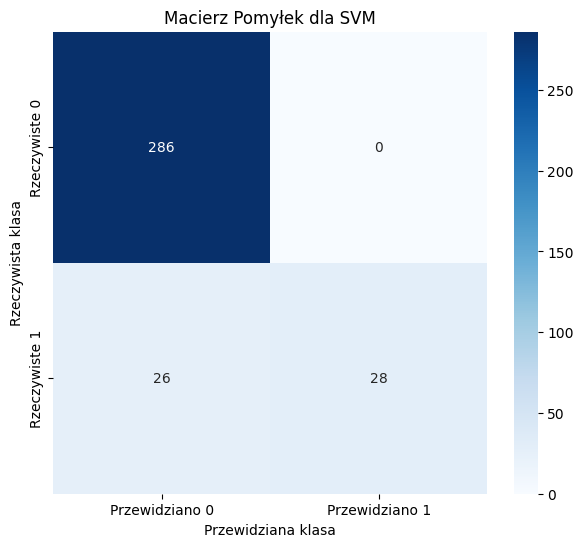


--- Model Regresji Liniowej ---
Model Regresji Liniowej wytrenowany.

Metryki oceny Regresji Liniowej:
Średni Błąd Kwadratowy (MSE): 9739938643052210176.00
Współczynnik Determinacji (R^2): -92823718799197143040.0000


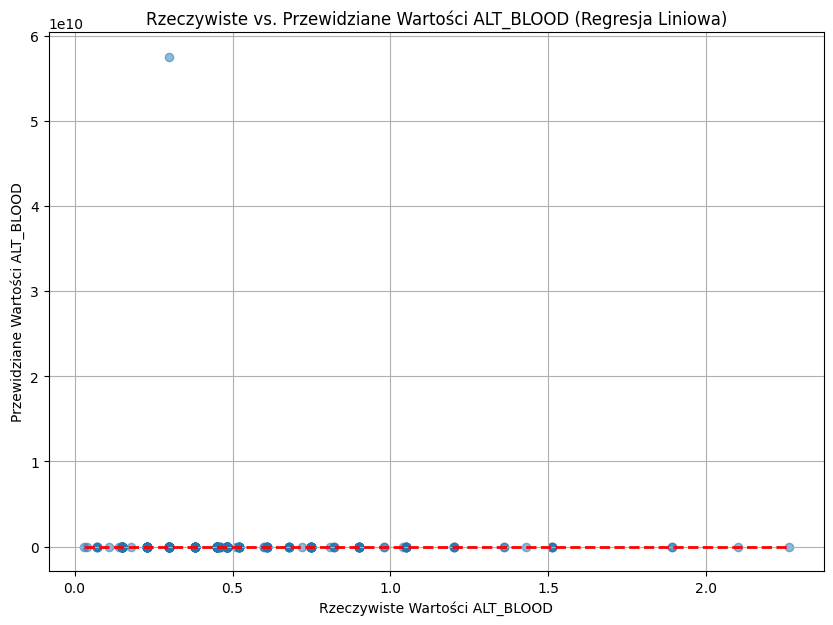

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    mean_squared_error,
    r2_score,
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


# Wczytywanie Danych
try:
    df = pd.read_csv('Myocardial infarction complications Database.csv')
    print("\nDane wczytane pomyślnie. Pierwsze 5 wierszy:")
    print(df.head())
    print("\nInformacje o danych:")
    df.info()
except FileNotFoundError:
    print("BŁĄD: Plik 'Myocardial infarction complications Database.csv' nie został znaleziony.")
    print("Upewnij się, że plik znajduje się w tym samym katalogu co Jupyter Notebook.")
    exit()

# Usunięcie niepotrzebnych kolumn (odpowiednik Column Filter)
if 'ID' in df.columns:
    df = df.drop('ID', axis=1)
    print("\nKolumna 'ID' usunięta.")
else:
    print("\nKolumna 'ID' nie istnieje.")

# Konwersja numerycznych kolumn kategorycznych na String (odpowiednik Number to String)
categorical_like_numbers_to_string = [
    'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A',
    'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08',
    'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10',
    'endocr_01', 'endocr_02', 'endocr_03',
    'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06',
    'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST',
    'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P',
    'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08',
    'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10',
    'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12',
    'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08',
    'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S',
    'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN',
    'LET_IS'
]

for col in categorical_like_numbers_to_string:
    if col in df.columns:
        df[col] = df[col].astype(str)
print(f"\nSkonwertowano {len(categorical_like_numbers_to_string)} kolumn na typ String.")

# Binarizacja LET_IS na Outcome_Binary (odpowiednik Rule Engine)
df['Outcome_Binary'] = np.where(df['LET_IS'] == '0', '0', '1')
print("\nKolumna 'LET_IS' zbinarizowana do 'Outcome_Binary'.")
print("Rozkład 'Outcome_Binary':")
print(df['Outcome_Binary'].value_counts())

# Usunięcie oryginalnej kolumny LET_IS (odpowiednik Column Filter)
df = df.drop('LET_IS', axis=1)
print("\nOryginalna kolumna 'LET_IS' usunięta.")

# Obsługa Brakujących Wartości (odpowiednik Missing Value)
print("\nBrakujące wartości przed imputacją:")
missing_before_imputation = df.isnull().sum()
print(missing_before_imputation[missing_before_imputation > 0])

numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mean())
        
string_cols = df.select_dtypes(include='object').columns
for col in string_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode()[0])
print("\nBrakujące wartości po imputacji:", df.isnull().sum().sum())

# Kodowanie Zmiennych Kategorycznych (odpowiednik One-to-Many)
one_hot_cols = [col for col in df.select_dtypes(include='object').columns if col != 'Outcome_Binary']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

print(f"\nKolumny po One-Hot Encoding. Nowa liczba kolumn: {df.shape[1]}")
print("Pierwsze 5 wierszy po One-Hot Encoding:")
print(df.head())

# Skalowanie Cech Numerycznych (odpowiednik Normalizer)
X = df.drop(['Outcome_Binary', 'ALT_BLOOD'], axis=1)
y_clf = df['Outcome_Binary']
y_reg = df['ALT_BLOOD']

scaler = StandardScaler()
numeric_cols_for_scaling = X.select_dtypes(include=np.number).columns
X[numeric_cols_for_scaling] = scaler.fit_transform(X[numeric_cols_for_scaling])
print("\nCechy numeryczne przeskalowane (StandardScaler).")

# Podział na Zbiór Treningowy i Testowy (odpowiednik Partitioning)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)
print(f"\nRozmiar zbioru treningowego (klasyfikacja): {X_train_clf.shape}")
print(f"Rozmiar zbioru testowego (klasyfikacja): {X_test_clf.shape}")
print("Rozkład klas w y_train_clf przed SMOTE:", y_train_clf.value_counts())

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)
print(f"Rozmiar zbioru treningowego (regresja): {X_train_reg.shape}")
print(f"Rozmiar zbioru testowego (regresja): {X_test_reg.shape}")

# Balansowanie Klas za pomocą SMOTE (dla klasyfikacji)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_clf_resampled, y_train_clf_resampled = smote.fit_resample(X_train_clf, y_train_clf)

print("\nRozkład klas w y_train_clf_resampled po SMOTE:")
print(y_train_clf_resampled.value_counts())

# --- Model Klasyfikacji (SVM) ---
print("\n--- Model Klasyfikacji: Support Vector Machine (SVM) ---")

# Trenowanie modelu SVM (odpowiednik SVM Learner)
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train_clf_resampled, y_train_clf_resampled)
print("Model SVM wytrenowany.")

# Przewidywanie za pomocą SVM (odpowiednik SVM Predictor)
y_pred_svm = svm_model.predict(X_test_clf)

# Ocena Modelu Klasyfikacji (odpowiednik Scorer)
print("\nMetryki oceny SVM:")
print(f"Dokładność (Accuracy): {accuracy_score(y_test_clf, y_pred_svm):.4f}")
print("\nRaport klasyfikacji:")
print(classification_report(y_test_clf, y_pred_svm))

print("\nMacierz pomyłek:")
cm_svm = confusion_matrix(y_test_clf, y_pred_svm)
print(cm_svm)

plt.figure(figsize=(7, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Przewidziano 0', 'Przewidziano 1'],
            yticklabels=['Rzeczywiste 0', 'Rzeczywiste 1'])
plt.title('Macierz Pomyłek dla SVM')
plt.xlabel('Przewidziana klasa')
plt.ylabel('Rzeczywista klasa')
plt.show()


# --- Model Regresji Liniowej ---
print("\n--- Model Regresji Liniowej ---")

# Trenowanie modelu regresji liniowej (odpowiednik Linear Regression Learner)
lr_model = LinearRegression()
lr_model.fit(X_train_reg, y_train_reg)
print("Model Regresji Liniowej wytrenowany.")

# Przewidywanie za pomocą regresji liniowej (odpowiednik Regression Predictor)
y_pred_lr = lr_model.predict(X_test_reg)

# Ocena Modelu Regresji (odpowiednik Numeric Scorer)
print("\nMetryki oceny Regresji Liniowej:")
print(f"Średni Błąd Kwadratowy (MSE): {mean_squared_error(y_test_reg, y_pred_lr):.2f}")
print(f"Współczynnik Determinacji (R^2): {r2_score(y_test_reg, y_pred_lr):.4f}")

plt.figure(figsize=(10, 7))
plt.scatter(y_test_reg, y_pred_lr, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.xlabel('Rzeczywiste Wartości ALT_BLOOD')
plt.ylabel('Przewidziane Wartości ALT_BLOOD')
plt.title('Rzeczywiste vs. Przewidziane Wartości ALT_BLOOD (Regresja Liniowa)')
plt.grid(True)
plt.show()



In [4]:
%pip install seaborn